# Symbolic calculations in Jupyter

So far we have focused on numbers and list of numbers, and ways to manipulate and plot them. More recently we have also learned ways to produce nice text using *markdown*. One important task not covered yet is symbolic computation. For example we would like to be able to quickly take the derivative or the integral of a function, add up fractions, expand and factorize (products of) polynomials or similar tasks which you might have practiced a lot doing by hand in secondary-school.  


In order to make python aware that we want to do symbolic calculations, we start by importing the library [sympy](http://sympy.org/) like so:

    import sympy as sym
Here again the `sym` is similar to `np` when we imported numpy, and is just a shorthand, which allows us to access the functions in the `sympy` library with the short prefix `sym`. Like with many things in python, there is a lot of information on `sympy` on the internet, for example a [live interpreter](http://live.sympy.org/) which you can use in a web browser without any python installation and also the official [tutorial](http://docs.sympy.org/latest/tutorial/) which I follow here loosely.

In order to get nice printing of the formulas in the python output we also issue

    sym.init_printing(use_latex="mathjax")

In order to be able to use symbols for symbolic calculations, let us define a number of python variables as symbols as follows:

    x, y, z, t = sym.symbols('x y z t')
    
After this line the python variables `x`, `y`, `z` and `t` are now symbols with which we can do symboloic calculations. 

In summary, let us execute the following boilerplate cell, which also imports the plotting and numpy facilities:
    

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
from ipywidgets import interact

sym.init_printing(use_latex="mathjax")
x, y, z, t = sym.symbols('x y z t')

The variables `x, y, z, t` are now of the type

In [ ]:
type(x)

After this we can now write simple expressions, for example

In [ ]:
expr = x * 2 + x**2 - 3
expr

The expression `expr` is of the following type

In [ ]:
type(expr)

You should see that the polynomial is printed nicely ordered, but nothing spectacular happened yet. Note that we now use again the python notation `**` for *to the power of* and not the LaTeX notation with the caret `^` ! 

In [ ]:
expr - x

okay, as expected

In [ ]:
expr*x

Now we see that the brackets are not expanded out, but left alone. If we want to expand, we do 

In [ ]:
expr2 = sym.expand(expr*x)
expr2

The same effect can also be achieved with the following syntax, which is sometimes more convenient:

In [ ]:
(expr*x).expand()

Similarly `sym.factor` allows us to factorize expressions. 

In [ ]:
sym.factor(expr2)

Of course we also have access to fractions, 

In [ ]:
expr3 = (x-1)/(x**2-1)
expr3

Here the factor $(x-1)$ was not automatically cancelled from nominator and denominator. We can fix this by calling `sym.cancel`, which tries to cancel common factors.

In [ ]:
sym.cancel(expr3)

In this case, we could also have used the more generic `sym.simplify` which in general tries to find short expressions with a number of different strategies.

In [ ]:
sym.simplify(expr3)

We can use `sym.Eq()` to make a nice mathematical equation out of it:

In [ ]:
sym.Eq(expr3, sym.cancel(expr3))

Using `expr.subs()` we can substituts variables with other expressions, for example:

In [ ]:
(x**2 - 1).subs({x:y-1})

Note the notation `{x:y-1}` here. The symbol `x` gets replaced by the term `y-1`. Again we need to explicitly `simplify()` this expression, if we want a simpler expression. 

In [ ]:
(x**2 - 1).subs({x:y-1}).simplify()

## Common mathematical functions

Standard mathematical functions work as expected with sympy

In [ ]:
sym.sqrt(1/(x**2-1))

In [ ]:
sym.cos(3*t) + sym.tan(5*t)

In [ ]:
sym.log(1+x) - sym.log(1-x)

In [ ]:
(sym.log(1+x) - sym.acosh(1-x))

In [ ]:
sym.pi

## Evaluating an expression numerically

To obtain a numerical value for a symbolic expression `expr`, we can use `expr.evalf()`, for example the following calculate $\pi$ to 100 digits:

In [ ]:
sym.pi.evalf(100)

Because this operation of obtaining the numerical value is often used, there are actually two alternative ways for obtaining the same result:

In [ ]:
sym.pi.n(100)

In [ ]:
sym.N(sym.pi,100)

`evalf()` can also be used to evaluate an expression by substituting variables with certain values. For example with 

In [ ]:
expr = sym.sqrt(x)
print(expr.evalf(subs={x:0.04}))
print(expr.evalf(subs={x:0.05}))

## Differentiation and integration

Sympy is capable of doing basic calculus. For example

In [ ]:
sym.diff(sym.sin(x),x)

Suppose that a Calculus result such as the indefinite integral of x cubed times the sine of x is needed.

In [ ]:
sym.Integral( sym.sin(x) * x**3,(x,3,5) )

In [ ]:
sym.integrate( sym.sin(x) * x**3,(x,3,5) )

Note that the first command simply returns the expression for the integral, while the second expression actually evaluates it. To get a proper number, do `evalf()`:

In [ ]:
sym.integrate( sym.sin(x) * x**3,(x,3,5) ).evalf()

To get a nice equation you can also do the following:

In [ ]:
expr = sym.Integral(sym.sin(x) * x**3,x)
sym.Eq(expr, expr.doit())

Here we have used `Eq(expr1,expr2)` to write out an equation `expr1=expr2` and `expr.doit()` to perform the integration in `expr`. 

Similarly a pair of commands Derivative and diff exists

In [ ]:
expr = sym.Derivative(sym.tan(sym.sqrt(x)))
sym.Eq(expr, sym.simplify(expr.doit()))

In [ ]:
q = sym.Integral(sym.simplify(expr.doit()))
sym.Eq(q, sym.simplify(q.doit()))

In [ ]:
q = sym.Integral(sym.sin(x**2), (x, -sym.oo, sym.oo))
sym.Eq(q, sym.simplify(q.doit()))

In this last equation, we have denoted the limits of the integral using `sym.oo` which corresponds to infinity  (note the similarity to the symbol $\infty$).  We have, for example

In [ ]:
sym.oo > 1000

## Combining sympy with sliders

It is very efficient to combine sympy with interactive sliders. For example consider the following expression:

In [ ]:
expr = (x+y)**17 
sym.Eq(expr, sym.expand(expr))

We can now change the number 17 by hand, if we want to explore what happens for other powers. However we can also introduce a slider:

In [ ]:
from ipywidgets import interact

@interact(n=(1,30))
def pol(n=16):
    expr = (x+y)**n 
    print(sym.Eq(expr, sym.expand(expr)))

Note that while this works, the printing of the formula with `print()` is not as nice as before.  We can fix this by using a function `display()` as follows:

In [ ]:
from ipywidgets import interact
from IPython.display import display

@interact(n=(1,30))
def pol(n=16):
    expr = (x+y)**n 
    display(sym.Eq(expr, sym.expand(expr)))

## Plotting your functions

Now that we have set up a number of functions, let us also see how we can plot them. Let's say that the task is to plot the function 
\begin{equation}
f(x) = \sin\left( x^2 \right)
\end{equation}
and its derivative $f'(x)$ into the same graph. Using `sys.evalf` we could of course try to evaluate the function $f(x)$ point by point, then construct a list of points and then plot it. Instead of this, we use a more elegant method of converting our function into a "numpy" function. This function, can then be plotted in the usual way. Explicitly:

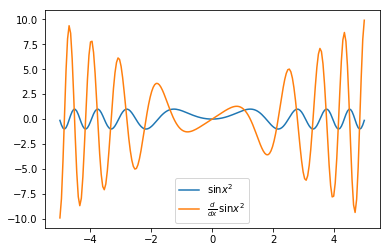

In [2]:
f = sym.sin(x**2)
fprime = sym.diff(f,x)

f_np = sym.lambdify(x, f)
fprime_np   = sym.lambdify(x, fprime)

myx = np.linspace(-5,5,200)

plt.plot(myx, f_np(myx), label=r"$\sin x^2$")
plt.plot(myx, fprime_np(myx), label=r"$\frac{d}{dx}\,\sin x^2$")
plt.legend()

Note also that the label strings are written in the format `r"..."`. Strings with the letter `r` in front of them indicate *raw* strings. Try, what happens, if you take out the `r`.

## Solving equations

One common task in algebra is to solve a set of simultaneous equations, say

\begin{align}
3 x + 5 y &= 13\\
x + 2 y &= 5
\end{align}


To get the values of $x$ and $y$ in this case, we do

In [ ]:
equations = [ 3*x + 5*y - 13, 
                x + 2*y - 5 ]
sym.solve(equations, (x,y) )

Of course, more complicated equations, with more than one solution is also possible, for example the popular 
\begin{equation}
ax^2 + bx + c = 0.
\end{equation}

In [ ]:
a,b,c = sym.symbols("a b c")
sym.solve(a*x**2 + b*x +c, x )

## Series expansion

Once you have a given (possibly complicated) expression, you might want to aprroximate it around a given point $x_0$ by simple polynomials.  Such an expansion is called a Taylor expansion and approximates for example a function $f(x)$ as follows:

\begin{equation}
  f(x) \approx f(x_0) + f'(x_0) (x-x_0) + \frac{f''(x_0)}{2} (x-x_0)^2 + \frac{f'''(x_0)}{3!} (x-x_0)^3 + \ldots
\end{equation}

The Taylor expansion involves the calculation of high-order derivatives and can be easily done by Python.  For example consider:

In [ ]:
f = sym.exp(sym.sin(x))
f

In [ ]:
f.series(x, 0, 5)

For further calculations, we might like to remove the $\mathcal{O}$ symbol:

In [ ]:
f = sym.exp(sym.sin(x))
f.series(x, 0, 5).removeO()

Instead of expanding around 0, we might also want to expand around another number, for instance:

In [ ]:
f = sym.exp(sym.sin(x))
offset = 1
f.series(x, 1, 5).removeO()

Obviously the expressions get complicated, and it would be nice to see, what we are actually doing. Let us therefore look at plotting symbolic functions

We can now return to our previous problem of plotting the series expansion of $e^{\sin x}$

In [ ]:
f = sym.exp(sym.sin(x))
offset = 1
s1 = f.series(x, offset, 2).removeO()
s2 = f.series(x, offset, 3).removeO()
s3 = f.series(x, offset, 4).removeO()
s4 = f.series(x, offset, 5).removeO()

f_np = sym.lambdify(x, f, "numpy")

s1_np = sym.lambdify(x, s1, "numpy")
s2_np = sym.lambdify(x, s2, "numpy")
s3_np = sym.lambdify(x, s3, "numpy")

myx = np.linspace(-5,5,200)

plt.plot(myx, f_np(myx), label=r"$e^{\sin x}$")

plt.plot(myx, s1_np(myx), label=r"s1")
plt.plot(myx, s2_np(myx), label=r"s2")
plt.plot(myx, s3_np(myx), label=r"s3")
plt.legend()
plt.ylim((-2,3))
plt.plot(offset,f_np(offset),"ro")


Of course, we can also use a loop to reduce the repetitive parts in the code:

In [ ]:
f = sym.exp(sym.sin(x))
offset = 1

myx = np.linspace(-5,5,200)

f_np = sym.lambdify(x, f, "numpy")
plt.plot(myx, f_np(myx), label=r"$e^{\sin x}$")

for order in range(2,6):
    sx = f.series(x, offset, order).removeO()
    sx_np = sym.lambdify(x, sx, "numpy")
    plt.plot(myx, sx_np(myx), label=r"s" +str(order))


plt.legend()
plt.ylim((-2,3))
plt.plot(offset,f_np(offset),"ro")
